In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv("Admission_Predict.csv")


data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [30]:
data.head(6)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90


<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

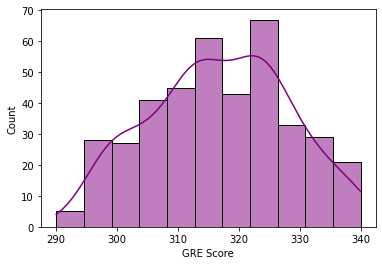

In [31]:
sns.histplot(data["GRE Score"], kde = True, color = "purple")

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

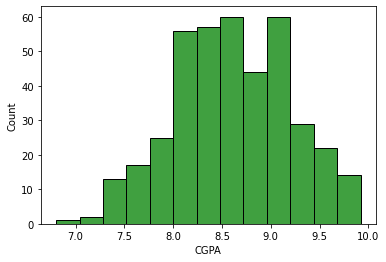

In [32]:
sns.histplot(data["CGPA"], color = "green")

<AxesSubplot:xlabel='University Rating', ylabel='count'>

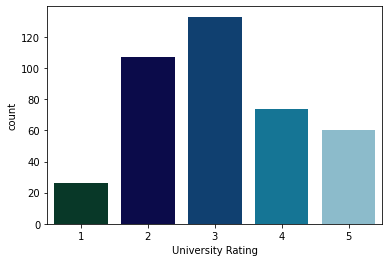

In [33]:
sns.countplot(data["University Rating"], palette="ocean")

<AxesSubplot:xlabel='Research', ylabel='count'>

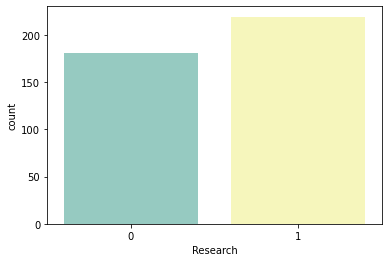

In [34]:
sns.countplot(data["Research"], palette="Set3")

<AxesSubplot:xlabel='Research', ylabel='count'>

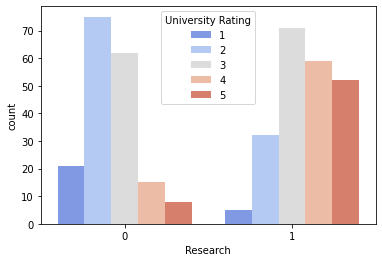

In [35]:
sns.countplot(data["Research"], hue = data["University Rating"],  palette="coolwarm")

<AxesSubplot:>

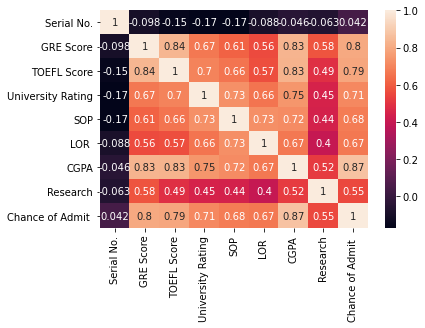

In [36]:
sns.heatmap(data.corr(), annot = True, cbar = True) #corrlation data

In [37]:
data["Chance of Admit"] = data["Chance of Admit "] #that space was annoying

In [38]:
x = data["CGPA"]

y = data["Chance of Admit"]

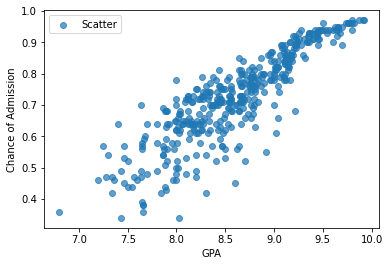

In [39]:
plt.scatter(x ,y, alpha = 0.7, label = "Scatter")

plt.ylabel("Chance of Admission")
plt.xlabel("GPA")
plt.legend()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

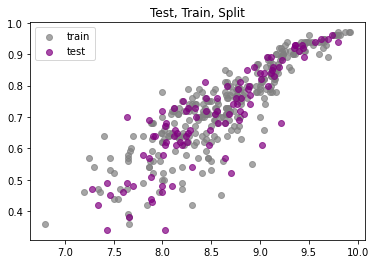

In [41]:
plt.scatter(X_train, y_train, alpha  = 0.7, c = "gray", label = "train")
plt.scatter(X_test, y_test, alpha  = 0.7, c = "purple", label = "test")

plt.title("Test, Train, Split")
plt.legend()

In [42]:
model = LinearRegression()

In [43]:
X_train = X_train.values.reshape(-1,1)

X_test = X_test.values.reshape(-1,1)

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
prediction = model.predict(X_test)

Text(0.5, 0, 'GPA')

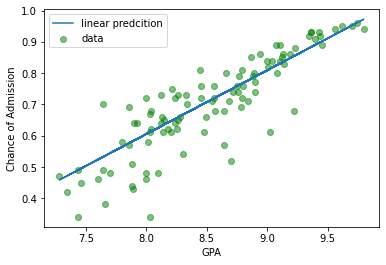

In [46]:
plt.scatter(X_test, y_test, alpha = 0.5, label = "data", c = "green")
plt.plot(X_test, prediction, label = "linear predcition")

plt.legend()
plt.ylabel("Chance of Admission")
plt.xlabel("GPA")

In [47]:
print(model.coef_)
print(model.intercept_)

[0.20387547]
-1.0258586375247585


In [62]:
i = 8.9

np.round(model.predict(np.array([[i]])), 4)[0] *100

78.86

In [49]:
model.score(X_test, y_test)

0.7431748592364351

In [50]:
y_mutiple = data["Chance of Admit"]

x_mutiple = data[["CGPA", "GRE Score", "TOEFL Score"]] #top three correlations

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_mutiple,y_mutiple)

In [52]:
X_train_multiple = X_train.values.reshape(-1,3)

X_test_multiple = X_test.values.reshape(-1,3)

In [53]:
multiple_model = LinearRegression()

multiple_model.fit(X_train_multiple, y_train)

LinearRegression()

In [54]:
print(multiple_model.coef_, "coefs")

print(multiple_model.intercept_, "intercept")

[0.14049464 0.00258481 0.00344968] coefs
-1.6735431612907488 intercept


In [55]:
print(multiple_model.predict([[8.9, 320, 100]])[0]*100, "% chance to be admitted")

74.89653726056562 % chance to be admitted


In [56]:
multiple_model.score(X_test_multiple, y_test)

0.7509366834366269